In [2]:
import pandas as pd
import yfinance as yf
from datetime import datetime
import plotly.express as px


In [3]:
start_date = datetime.now() - pd.DateOffset(months = 3)
end_date = datetime.now()

In [4]:
tickers = ['AAPL','MSFT','NFLX','GOOG']

In [5]:
df_list = []

In [6]:
for ticker in tickers:
    data = yf.download(ticker, start = start_date, end = end_date)
    df_list.append(data)
    

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [7]:
df = pd.concat(df_list, keys = tickers, names = ['Ticker', 'Date'])
print(df.head())

                         Open        High         Low       Close   Adj Close  \
Ticker Date                                                                     
AAPL   2023-08-22  177.059998  177.679993  176.250000  177.229996  176.996811   
       2023-08-23  178.520004  181.550003  178.330002  181.119995  180.881699   
       2023-08-24  180.669998  181.100006  176.009995  176.380005  176.147934   
       2023-08-25  177.380005  179.149994  175.820007  178.610001  178.375000   
       2023-08-28  180.089996  180.589996  178.550003  180.190002  179.952927   

                     Volume  
Ticker Date                  
AAPL   2023-08-22  42084200  
       2023-08-23  52722800  
       2023-08-24  54945800  
       2023-08-25  51449600  
       2023-08-28  43820700  


In [8]:
df = df.reset_index()
print(df.head())

  Ticker       Date        Open        High         Low       Close  \
0   AAPL 2023-08-22  177.059998  177.679993  176.250000  177.229996   
1   AAPL 2023-08-23  178.520004  181.550003  178.330002  181.119995   
2   AAPL 2023-08-24  180.669998  181.100006  176.009995  176.380005   
3   AAPL 2023-08-25  177.380005  179.149994  175.820007  178.610001   
4   AAPL 2023-08-28  180.089996  180.589996  178.550003  180.190002   

    Adj Close    Volume  
0  176.996811  42084200  
1  180.881699  52722800  
2  176.147934  54945800  
3  178.375000  51449600  
4  179.952927  43820700  


In [16]:

fi = px.line(df, x = 'Date',
            y = 'Close',
            color = 'Ticker',
            height = 600,
            width = 600,
            title = 'Stock Market Performance for last 3 months')
fi.show()


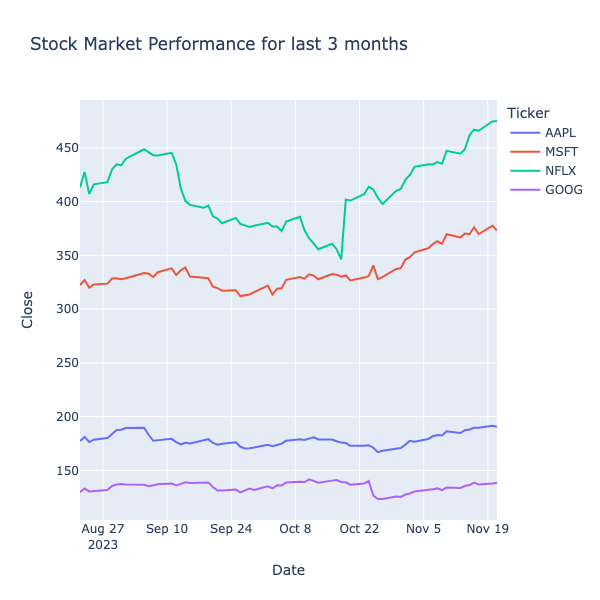

In [9]:
f = px.area(df,
           x='Date',
           y='Close',
           color = 'Ticker',
            height = 600,
            width = 600,
           facet_col = 'Ticker', 
           labels = {'Date':'Date', 'Close':'Closing Price', 'Ticker':'Company'},
           title = 'Stock Prices for Apple, Microsoft, Netfix, and Google')
f.show()

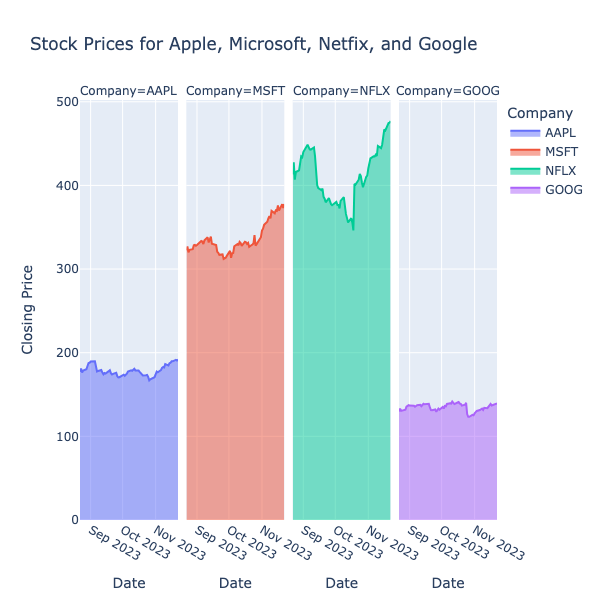

## Analysing moving averages of a company


### About moving avergaes:   
## A 10 day moving average would average out the closing prices of the stock for the first 10 days as the first datapoint, and the same follows for corresponding number of days

In [10]:
df["MA26"] = df.groupby("Ticker")['Close'].rolling(window = 26).mean().reset_index(0, drop = True)
df["MA12"] = df.groupby("Ticker")['Close'].rolling(window = 12).mean().reset_index(0, drop = True)
for ticker, group in df.groupby('Ticker'):
    print(f'Moving Averages for {ticker}')
    print(group[['MA12', 'MA26']])

Moving Averages for AAPL
          MA12        MA26
0          NaN         NaN
1          NaN         NaN
2          NaN         NaN
3          NaN         NaN
4          NaN         NaN
..         ...         ...
61  182.575001  177.854617
62  183.885001  178.200001
63  185.041667  178.684616
64  186.207500  179.143078
65  187.257501  179.707693

[66 rows x 2 columns]
Moving Averages for GOOG
           MA12        MA26
198         NaN         NaN
199         NaN         NaN
200         NaN         NaN
201         NaN         NaN
202         NaN         NaN
..          ...         ...
259  132.794165  133.517691
260  133.574998  133.388846
261  134.353331  133.363461
262  135.040831  133.291537
263  135.694164  133.226152

[66 rows x 2 columns]
Moving Averages for MSFT
           MA12        MA26
66          NaN         NaN
67          NaN         NaN
68          NaN         NaN
69          NaN         NaN
70          NaN         NaN
..          ...         ...
127  361.716670  345.61

In [11]:
for ticker, group in df.groupby('Ticker'):
    fig = px.line(group, x = 'Date',
                  y = ['Close','MA12','MA26'],
                  height = 600,
                  width = 800,
                  title = f"{ticker} Moving Averages")
    fig.show()
                  

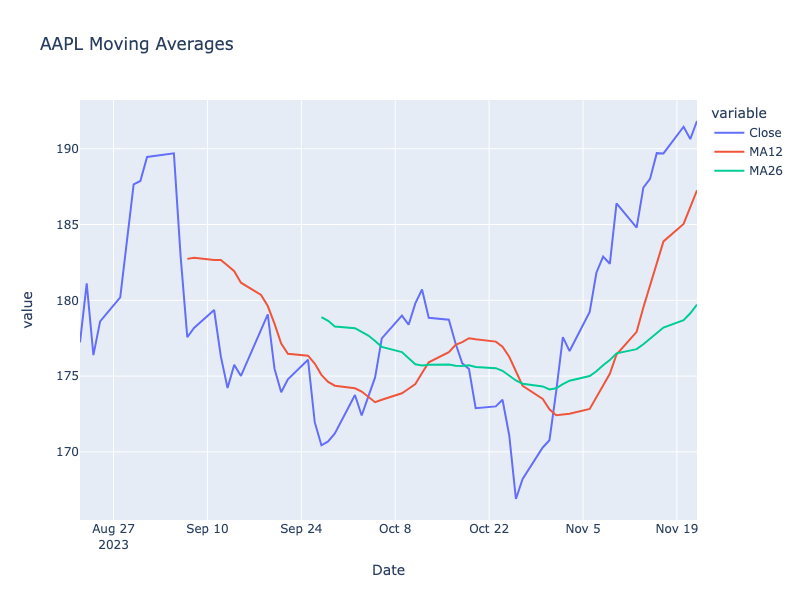

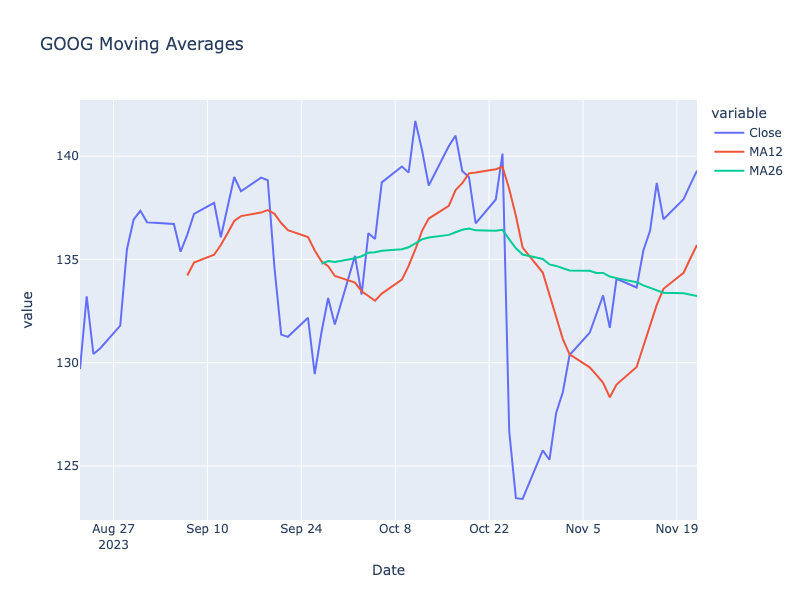

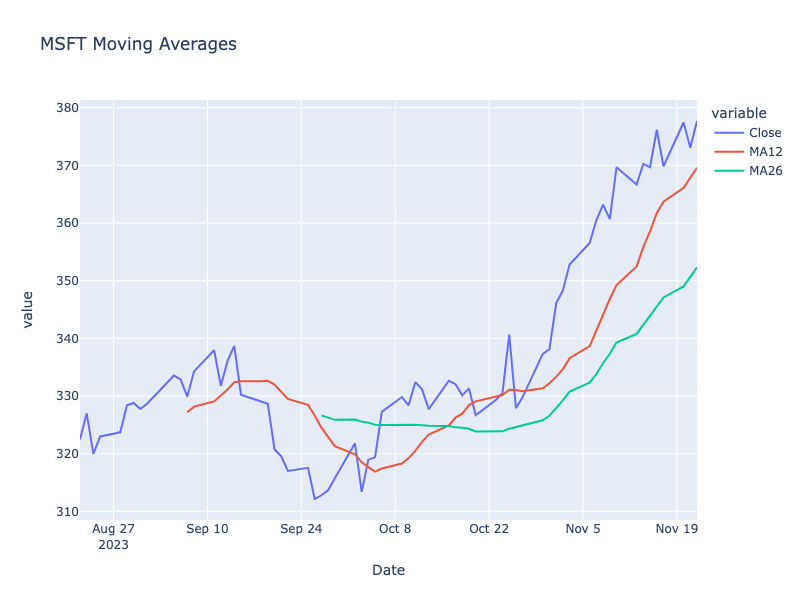

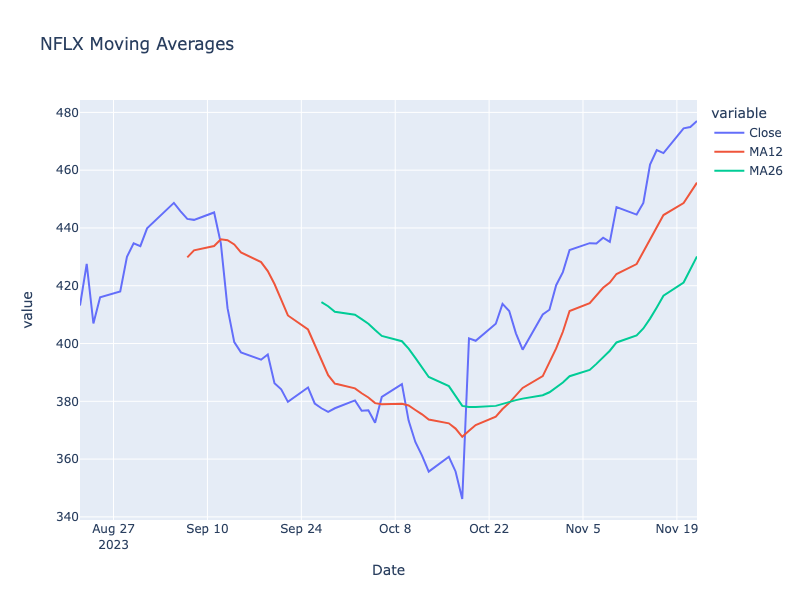

## Moving Average Convergence Divergence: 

#### The moving avergae convergence divergence is used for assessing the relationship between two moving averages. We typically calculate it by finding the difference between the 26 day moving average and the 12 day moving average. 
#### When Moving Average 12 is generally higher than the moving average 26, then we can say that we see an indication of upward momentum (bullish signal), and vice versa (bearish signal).



## Volatility

#### We will now check the volatility of the stocks with respect to the companies. 
#### Volatility refers to the wild fluctuation in an index over a short period of time. Financial market regulations include buffers to limit volatility.

In [12]:
df['Volatility'] = df.groupby("Ticker")['Close'].pct_change().rolling(window =10).std().reset_index(0, drop = True)
fig = px.line(df, 
              x = 'Date',
              y = 'Volatility',
              height = 600,
              width = 600, 
              color = 'Ticker',
              title = "Volatility of the Stock Prices, with respect to the companies")
fig.show()

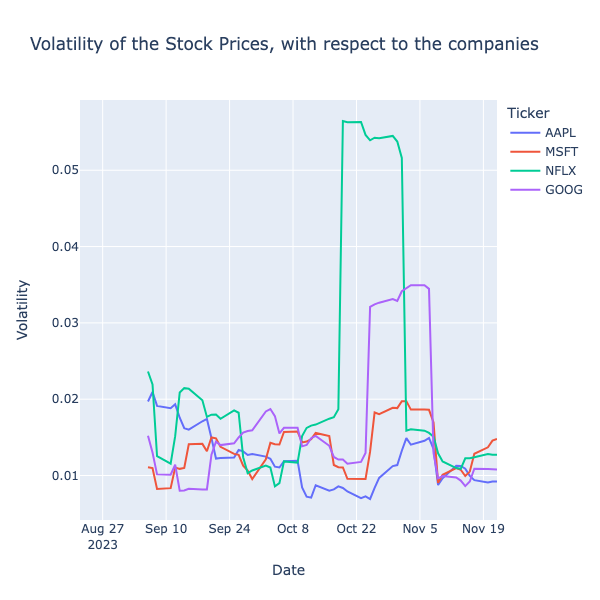

#### High Volatility indicates that the stock prices have been changing frequently, and the prices have been seeing frequent movement, and low volatility says that the prices have been seeing a less frequent movement, and have been stable for a stipulated duration of time. Here we see, that the red and blue lines that indicate Microsoft and Apple Stock prices respectively have the lowest volatility out of the four. 

#### We will further analyze by checking the correlation between the 2 companies

In [13]:
apple = df.loc[df['Ticker'] == 'AAPL', ['Date','Close']].rename(columns = {'Close': 'AAPL'})
microsoft = df.loc[df['Ticker'] == 'MSFT', ['Date','Close']].rename(columns = {'Close': 'MSFT'})
                   
df_corr = pd.merge(apple, microsoft, on= 'Date')


In [14]:
df_corr

,Date,AAPL,MSFT
0,2023-08-22,177.229996,322.459991
1,2023-08-23,181.119995,327.000000
2,2023-08-24,176.380005,319.970001
3,2023-08-25,178.610001,322.980011
4,2023-08-28,180.190002,323.700012
...,...,...,...
61,2023-11-16,189.710007,376.170013
62,2023-11-17,189.690002,369.850006
63,2023-11-20,191.449997,377.440002
64,2023-11-21,190.639999,373.070007


In [15]:
fig = px.scatter(df_corr, 
                 x = 'AAPL',
                 y = 'MSFT',
                 height = 600,
                 width = 600,
                 trendline = 'ols',
                 title = 'Correlation between Apple and Microsoft')
fig.show()

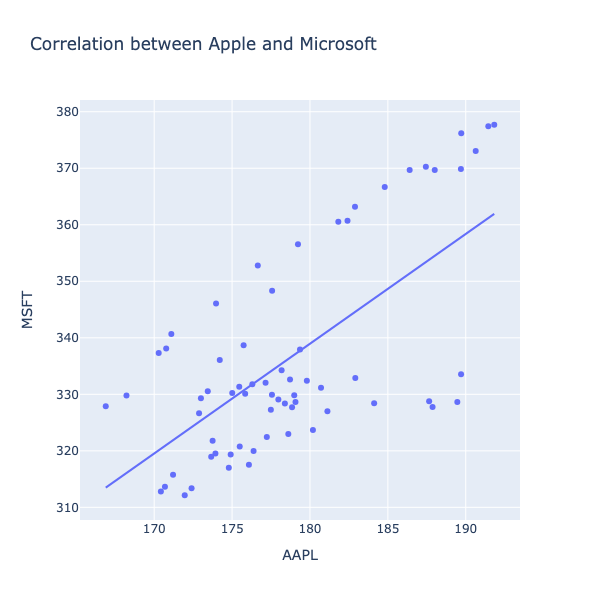

We see a strong linear relationship between the 2 stock prices. Furthermore, this is backed by residual analysis for the datapoints seem to be equally scattered above and below the trendline, and their vertical variance from the trendline also seems to be uniform across the left and right sides of the graph. Therefore, it satisfies the assumptions of error analysis too, and we can say that stock prices of the 2 companies are related.    
    
       
This correlation, contextually can be due to a myriad of reasons, some of which could include the similarity in industries, market conditions, common customers, investors, and business partners. For poeple who look forward to investing in these stocks, this may be an opportunity to diversify the portfolio by investing in both companies partially instead of investing all in one, as the stocks offer similar interests, returns and risks. 

